In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pywt


In [5]:
#Import the data 
data = pd.read_csv("data/closing_prices.csv")

#Rename unnamed: 0 to timestamp
data.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)

#Set index to timestamp
data.set_index('timestamp', inplace=True)
data.index = pd.to_datetime(data.index)


#Print the data
print(data.head())
print(data.info())
print(data.describe())

                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
timestamp                                                               
2023-06-01 04:00:00    176.0671       26771.89     181.65     38.1234   
2023-06-01 04:01:00    176.0572       26765.66     181.73     38.0804   
2023-06-01 04:02:00    175.8097       26780.09     181.73     38.1344   
2023-06-01 04:03:00    175.8592       26787.79     181.73     38.1204   
2023-06-01 04:04:00    175.9285       26793.74     181.73     38.1264   

                     QQQ_close  SPY_close  TSLA_close  
timestamp                                              
2023-06-01 04:00:00   343.4202   407.3890      203.70  
2023-06-01 04:01:00   343.2228   407.2040      203.33  
2023-06-01 04:02:00   343.2425   407.2624      203.18  
2023-06-01 04:03:00   343.1142   407.1651      202.90  
2023-06-01 04:04:00   343.2129   407.2138      202.79  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1050721 entries, 2023-06-01 04:00:00 to 202

In [8]:
#Compute returns 
returns = data.pct_change().dropna()

#Print the returns
print(returns.head())
print(returns.info())
print(returns.describe())

                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
timestamp                                                               
2023-06-01 04:01:00   -0.000056      -0.000233   0.000440   -0.001128   
2023-06-01 04:02:00   -0.001406       0.000539   0.000000    0.001418   
2023-06-01 04:03:00    0.000282       0.000288   0.000000   -0.000367   
2023-06-01 04:04:00    0.000394       0.000222   0.000000    0.000157   
2023-06-01 04:05:00   -0.000394       0.000037  -0.000605    0.000079   

                     QQQ_close  SPY_close  TSLA_close  
timestamp                                              
2023-06-01 04:01:00  -0.000575  -0.000454   -0.001816  
2023-06-01 04:02:00   0.000057   0.000143   -0.000738  
2023-06-01 04:03:00  -0.000374  -0.000239   -0.001378  
2023-06-01 04:04:00   0.000288   0.000120   -0.000542  
2023-06-01 04:05:00  -0.000172  -0.000406    0.000542  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1050720 entries, 2023-06-01 04:01:00 to 202

In [11]:
#Compute hourly realized volatility 

def compute_hourly_rv(returns):
    """
    Compute hourly realized volatility from returns.
    """
    squared_returns = returns ** 2
    hourly_rv = squared_returns.resample('1h').sum() ** 0.5
    hourly_rv.dropna(inplace=True)
    return hourly_rv

hourly_rv = compute_hourly_rv(returns)
print(hourly_rv.head())
print(hourly_rv.info())
print(hourly_rv.describe())

                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
timestamp                                                               
2023-06-01 04:00:00    0.002758       0.002146   0.001443    0.004406   
2023-06-01 05:00:00    0.002015       0.001720   0.001896    0.002353   
2023-06-01 06:00:00    0.001545       0.002005   0.001483    0.004307   
2023-06-01 07:00:00    0.002117       0.002247   0.001169    0.003944   
2023-06-01 08:00:00    0.003464       0.001885   0.005766    0.009315   

                     QQQ_close  SPY_close  TSLA_close  
timestamp                                              
2023-06-01 04:00:00   0.001508   0.001139    0.003883  
2023-06-01 05:00:00   0.001089   0.000985    0.003122  
2023-06-01 06:00:00   0.001316   0.000946    0.003342  
2023-06-01 07:00:00   0.001282   0.001022    0.004834  
2023-06-01 08:00:00   0.002851   0.002238    0.012160  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17513 entries, 2023-06-01 04:00:00 to 2025-

## Standardize Data 

In [12]:
#Standardize returns 
scaler = StandardScaler()

#Standardize each column across time 
standardized_returns = pd.DataFrame(
    scaler.fit_transform(returns),
    columns=returns.columns,
    index=returns.index
)


standardized_rv = pd.DataFrame(
    scaler.fit_transform(hourly_rv),
    columns=hourly_rv.columns,
    index=hourly_rv.index
)



#Print the standardized returns
print("====Standardized returns======")
print(standardized_returns.head())
print(standardized_returns.info())

print("====Standardized hourly realized volatility=====")
print(standardized_rv.head())
print(standardized_rv.info())

====Standardized returns======
                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
timestamp                                                               
2023-06-01 04:01:00   -0.047531      -0.339422   0.638662   -0.235034   
2023-06-01 04:02:00   -1.171670       0.778976  -0.001053    0.290234   
2023-06-01 04:03:00    0.233830       0.414407  -0.001053   -0.078072   
2023-06-01 04:04:00    0.327548       0.319625  -0.001053    0.030143   
2023-06-01 04:05:00   -0.328808       0.051314  -0.880275    0.013904   

                     QQQ_close  SPY_close  TSLA_close  
timestamp                                              
2023-06-01 04:01:00  -0.513574  -0.636552   -0.553973  
2023-06-01 04:02:00   0.050290   0.199919   -0.225999  
2023-06-01 04:03:00  -0.334286  -0.335298   -0.420705  
2023-06-01 04:04:00   0.255661   0.166589   -0.166533  
2023-06-01 04:05:00  -0.154745  -0.569790    0.163232  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1050720 entr

## Denoise Data using Wavelet Transfom

In [13]:
#Define function to denoise the data using wavelet transform

def wavelet_denoise(series, wavelet='db4'):
    """
    Denoise a time series using wavelet transform.
    """
    
    coeffs = pywt.wavedec(series, wavelet=wavelet, level=None)
    threshold = np.median(np.abs(coeffs[-1])) / 0.6745 * np.sqrt(2 * np.log(len(series)))
    coeffs_thresh = [coeffs[0]] + [pywt.threshold(c, threshold, mode='soft') for c in coeffs[1:]]
    return pywt.waverec(coeffs_thresh, wavelet=wavelet)[:len(series)]  # truncate padding


#Apply wavelet denoising to returns
denoised_returns = pd.DataFrame(index=standardized_returns.index)
for col in standardized_returns.columns:
    denoised_returns[col] = wavelet_denoise(standardized_returns[col].values)
   
#Apply wavelet denoising to hourly realized volatility
denoised_hourly_rv = pd.DataFrame(index=hourly_rv.index)
for col in hourly_rv.columns:
    denoised_hourly_rv[col] = wavelet_denoise(hourly_rv[col].values)


In [14]:
print("====Denoised returns=====")
print(denoised_returns.head())
print(denoised_returns.describe())
print(denoised_returns.info())

print("====Denoised hourly realized volatility=====")
print(denoised_hourly_rv.head())
print(denoised_hourly_rv.describe())
print(denoised_hourly_rv.info())

====Denoised returns=====
                     AAPL_close  BTCUSDT_close  GLD_close  NVDA_close  \
timestamp                                                               
2023-06-01 04:01:00   -0.047531       0.042841   0.638662   -0.235034   
2023-06-01 04:02:00   -1.171670       0.042797  -0.001053    0.290234   
2023-06-01 04:03:00    0.233830       0.042754  -0.001053   -0.078072   
2023-06-01 04:04:00    0.327548       0.042710  -0.001053    0.030143   
2023-06-01 04:05:00   -0.328808       0.042667  -0.880275    0.013904   

                     QQQ_close  SPY_close  TSLA_close  
timestamp                                              
2023-06-01 04:01:00  -0.513574  -0.636552   -0.553973  
2023-06-01 04:02:00   0.050290   0.199919   -0.225999  
2023-06-01 04:03:00  -0.334286  -0.335298   -0.420705  
2023-06-01 04:04:00   0.255661   0.166589   -0.166533  
2023-06-01 04:05:00  -0.154745  -0.569790    0.163232  
         AAPL_close  BTCUSDT_close     GLD_close    NVDA_close     QQQ

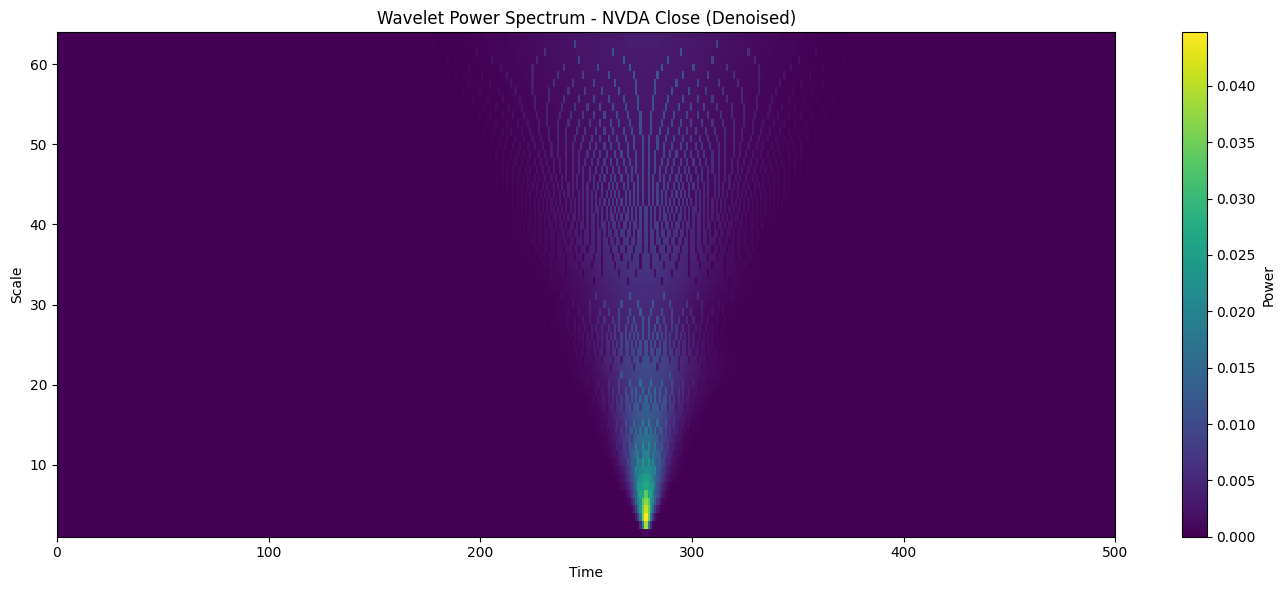

In [20]:
def plot_wavelet_power_spectrum(series, asset_name='', scale_max=128, wavelet='cmor1.5-1.0'):
    # Convert to numpy array
    signal = np.array(series)
    
    # Define scales
    scales = np.arange(1, scale_max + 1)

    # Perform Continuous Wavelet Transform
    coefficients, frequencies = pywt.cwt(signal, scales, wavelet)

    # Compute power
    power = np.abs(coefficients) ** 2

    # Plot
    plt.figure(figsize=(14, 6))
    plt.imshow(power, extent=[0, len(signal), 1, scale_max],
               interpolation='nearest', aspect='auto', cmap='viridis', origin='lower')
    plt.colorbar(label='Power')
    plt.ylabel('Scale')
    plt.xlabel('Time')
    plt.title(f'Wavelet Power Spectrum - {asset_name}')
    plt.tight_layout()
    plt.show()
    
    
# Choose an asset and a time range for clarity
sample = denoised_hourly_rv['NVDA_close'].iloc[:500]

plot_wavelet_power_spectrum(sample, asset_name='NVDA Close (Denoised)', scale_max=64)